In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
col = ["fLength","fWidth", "fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","Class"]
df= pd.read_csv("/content/magic04.data", names=col)

In [3]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


G = Gamma

H = Hydron

In [4]:
df["Class"].unique()

array(['g', 'h'], dtype=object)

In [5]:
df["Class"] =(df["Class"]=='g').astype(int)

In [6]:
print(df[df["Class"]==1]["fLength"].info())

<class 'pandas.core.series.Series'>
Index: 12332 entries, 0 to 12331
Series name: fLength
Non-Null Count  Dtype  
--------------  -----  
12332 non-null  float64
dtypes: float64(1)
memory usage: 192.7 KB
None


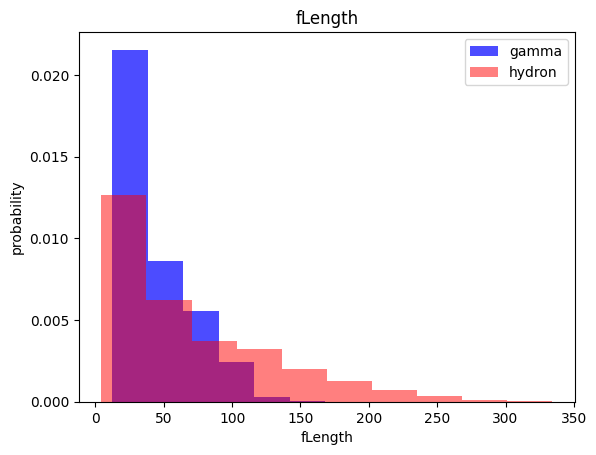

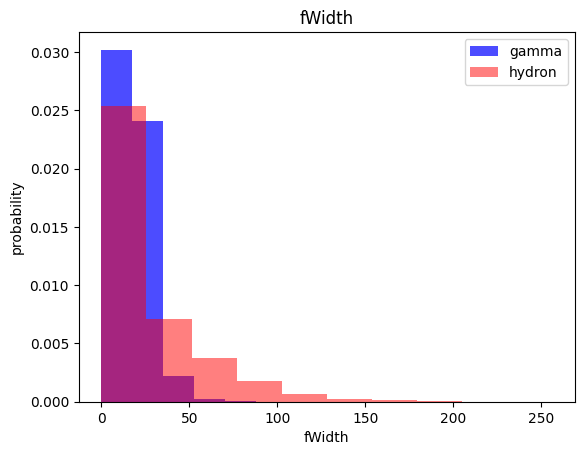

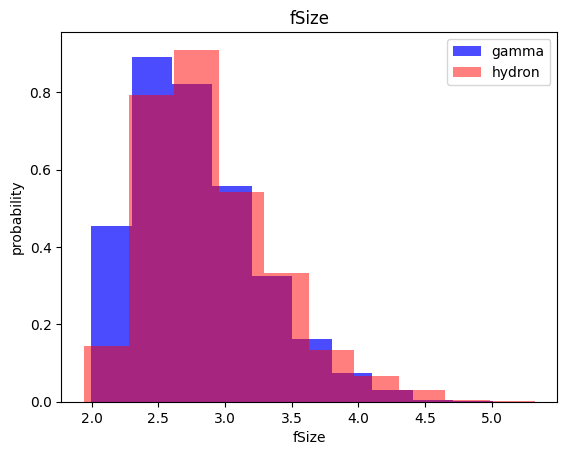

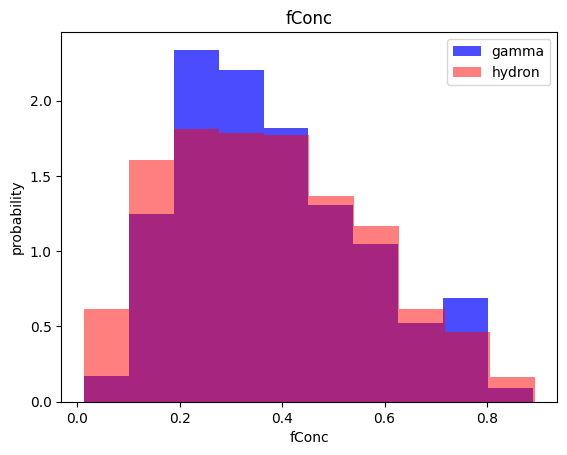

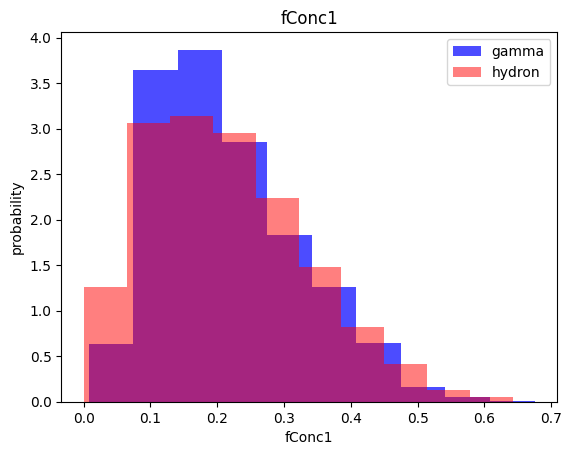

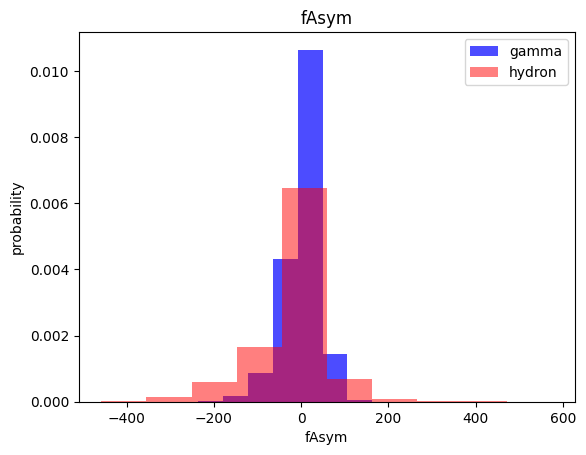

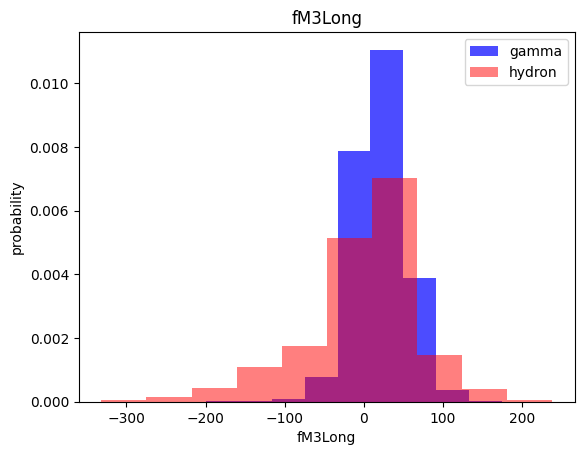

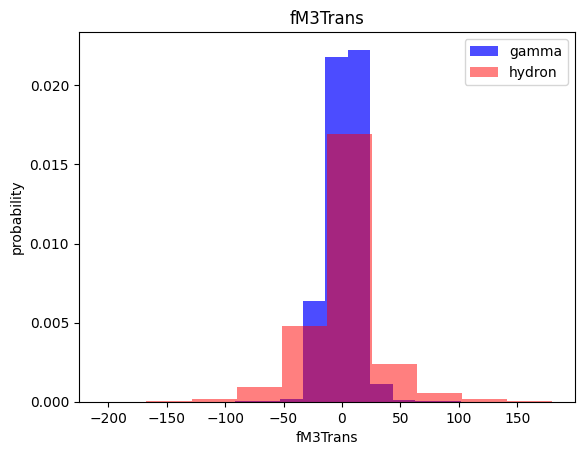

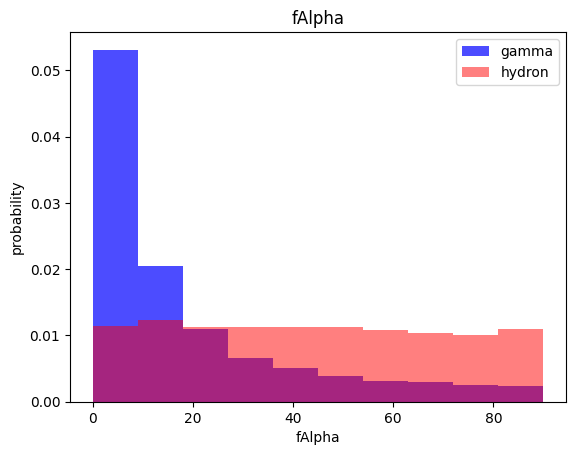

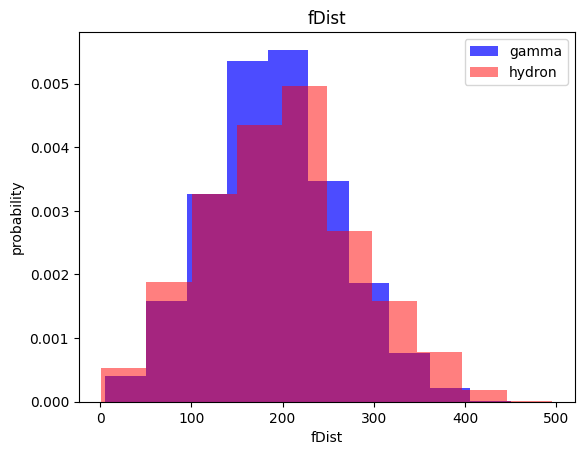

In [7]:
for label in col[:-1]:
  plt.hist(df[df["Class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["Class"]==0][label], color='red', label='hydron', alpha=0.5, density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


#Train, Validation and Test dataset

In [8]:
# np.split(df.sample(frac=1)) --> effectively shuffling the rows randomly. This ensure that the data is randomly distributed before spliting
'''So what happen is we first shuffl the rows of dataset and then split the data,
here we have train dataset around =60%,
validation dataset we have around =80% - 60% --> 20%'''
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
print(len(train[train['Class']==1])) # gamma
print(len(train[train['Class']==0])) # Hydron


7380
4032


In [14]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x , np.reshape(y, (-1,1))))

  return data,x,y

In [11]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [12]:
print(len(y_train))
print(len(y_train[y_train==1]))
print(len(y_train[y_train==0]))

14760
7380
7380


In [13]:
print(len(x_train))
print(len(x_train[x_train==1]))
print(len(x_train[x_train==0]))

14760
0
0


#KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train) # this line train the KNN model using the training data.

KNeighborsClassifier()

In [18]:
knn_pred = knn_model.predict(x_test)

In [19]:
knn_pred

array([0, 1, 0, ..., 1, 0, 1])

In [20]:
y_test

array([0, 1, 0, ..., 1, 0, 0])

In [21]:
class_report = classification_report(y_test, knn_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1335
           1       0.85      0.86      0.86      2469

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804

